In [ ]:
#importing all the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,5.368,5.400,5.180,5.324,5.324,6415000
1,2011-01-04,5.332,5.390,5.204,5.334,5.334,5937000
2,2011-01-05,5.296,5.380,5.238,5.366,5.366,7233500
3,2011-01-06,5.366,5.600,5.362,5.576,5.576,10306000
4,2011-01-07,5.600,5.716,5.580,5.648,5.648,11239500


keeping Open as a dependent variable

In [ ]:
df.shape

(2748, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2748 entries, 2011-01-03 to 2021-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2748 non-null   float64
 1   High       2748 non-null   float64
 2   Low        2748 non-null   float64
 3   Close      2748 non-null   float64
 4   Adj Close  2748 non-null   float64
 5   Volume     2748 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 150.3 KB


In [ ]:
df["Date"]=pd.to_datetime(df.Date)
df=df.set_index("Date")

In [ ]:
df.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-26', '2021-11-29',
               '2021-11-30', '2021-12-01'],
              dtype='datetime64[ns]', name='Date', length=2748, freq=None)

In [ ]:
#df = df.asfreq("MS")

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2.748000e+03
mean,122.035365,124.634072,119.349122,122.159489,122.159489,3.256467e+07
std,217.248949,222.043266,212.381619,217.581621,217.581621,2.836524e+07
min,4.356000,4.454000,4.222000,4.366000,4.366000,1.198000e+06
25%,29.323999,29.912000,28.394500,29.129499,29.129499,1.447325e+07
50%,47.146000,47.956999,46.233002,47.118000,47.118000,2.583225e+07
75%,67.323500,68.589503,66.061999,67.125502,67.125502,4.106788e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize'] = (18,5)
plt.rcParams['figure.dpi'] = 82

In [ ]:
#import matplotlib.pylab
#%pylab inline
#pylab.rcParams['figure.figsize']=(10,6)

In [ ]:
def graphs(x):
  for feature in x:
    df[feature].plot()
    plt.ylabel(feature)
    plt.show()

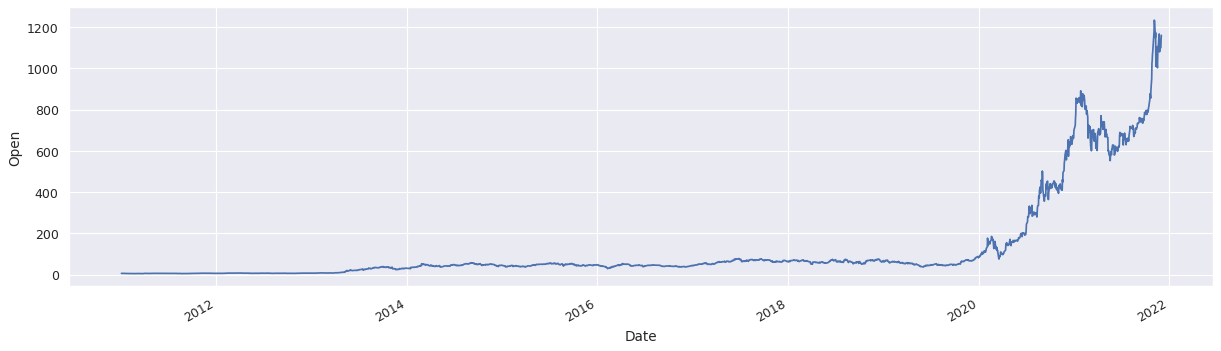

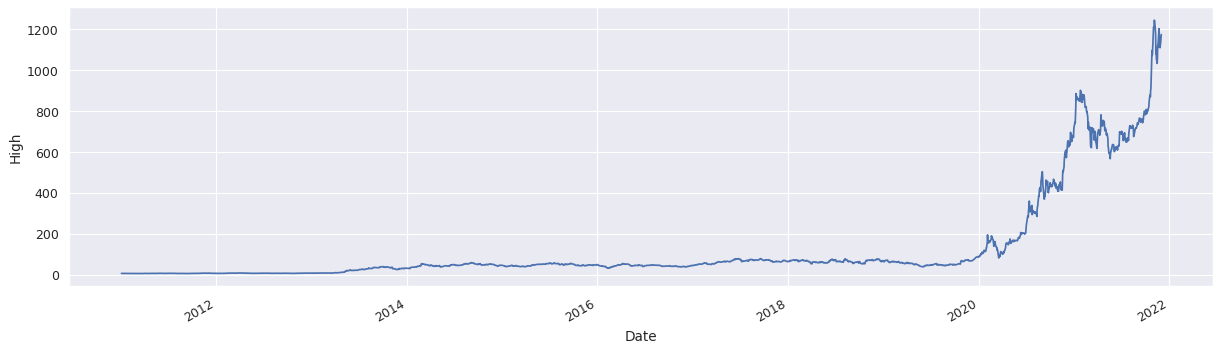

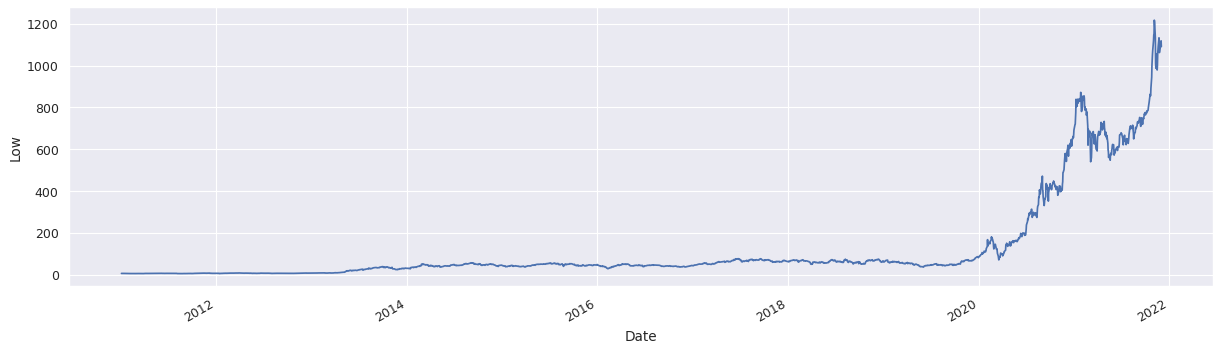

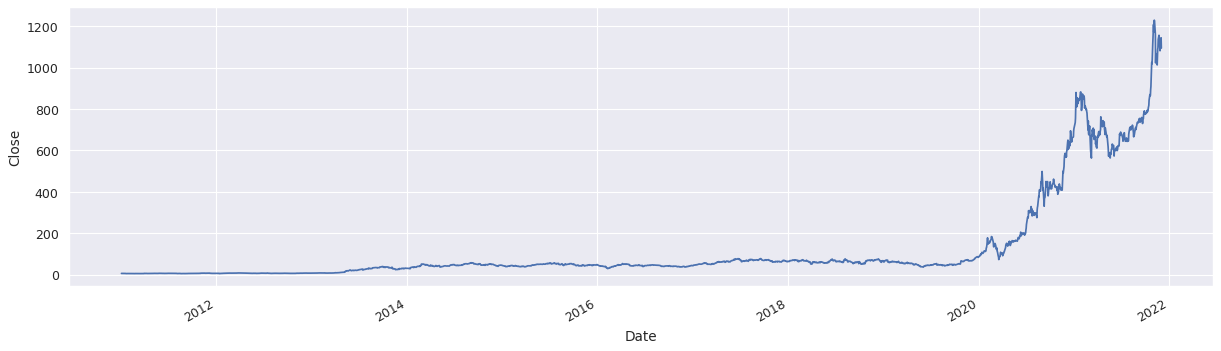

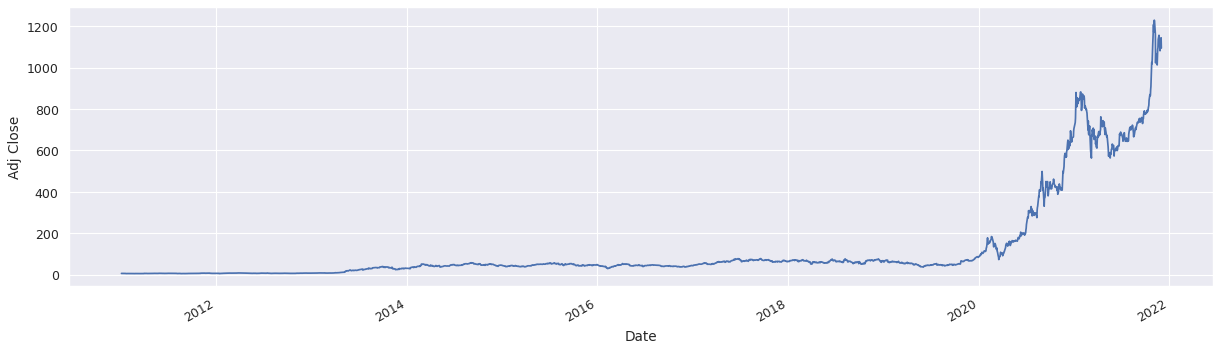

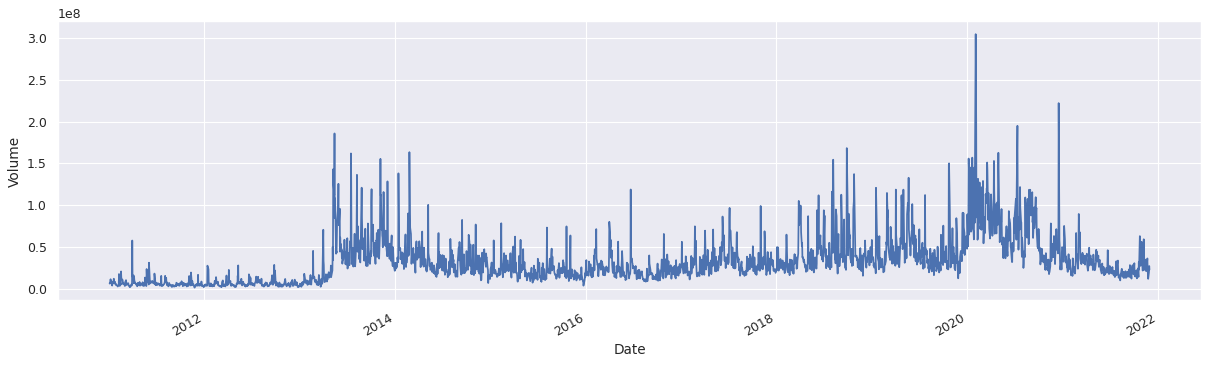

In [ ]:
graphs(df.columns)

In [ ]:
#data doesn't look to be a stationary one.

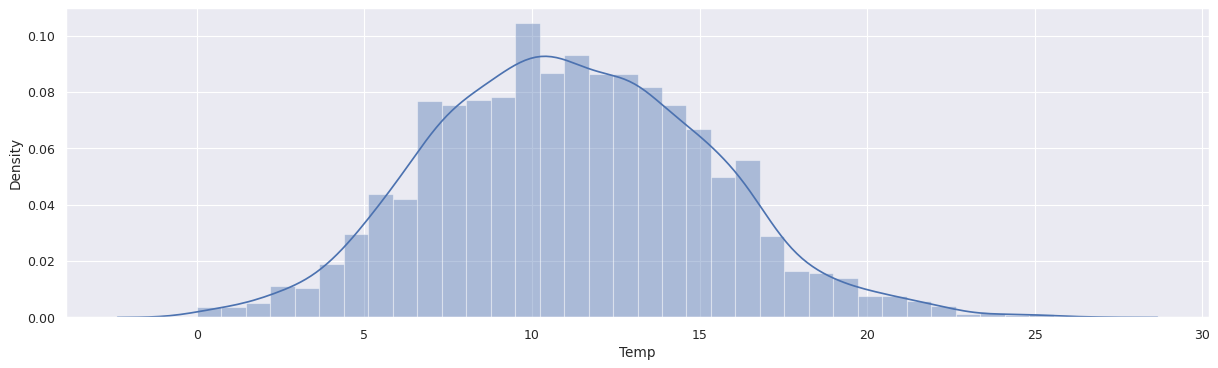

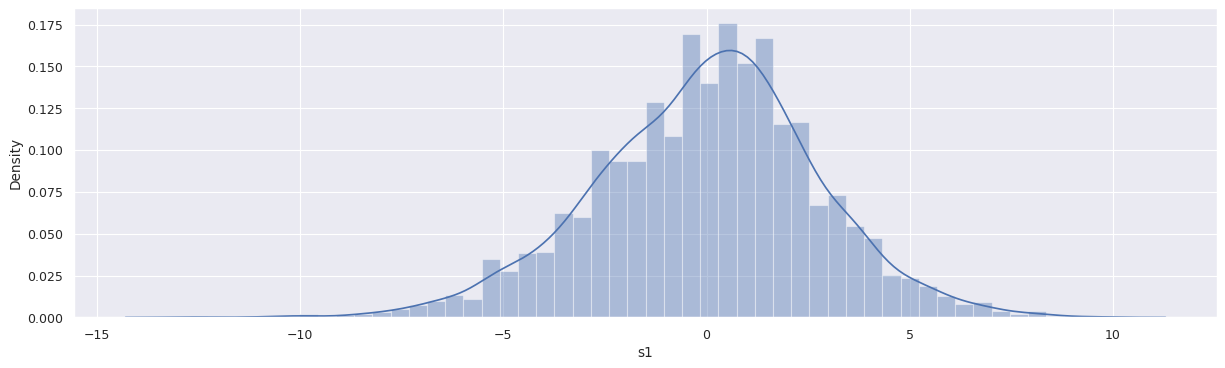

In [ ]:
for feature in df.columns:
  sns.distplot(df[feature])
  plt.show()

#Seasonal Decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1476x410 with 0 Axes>

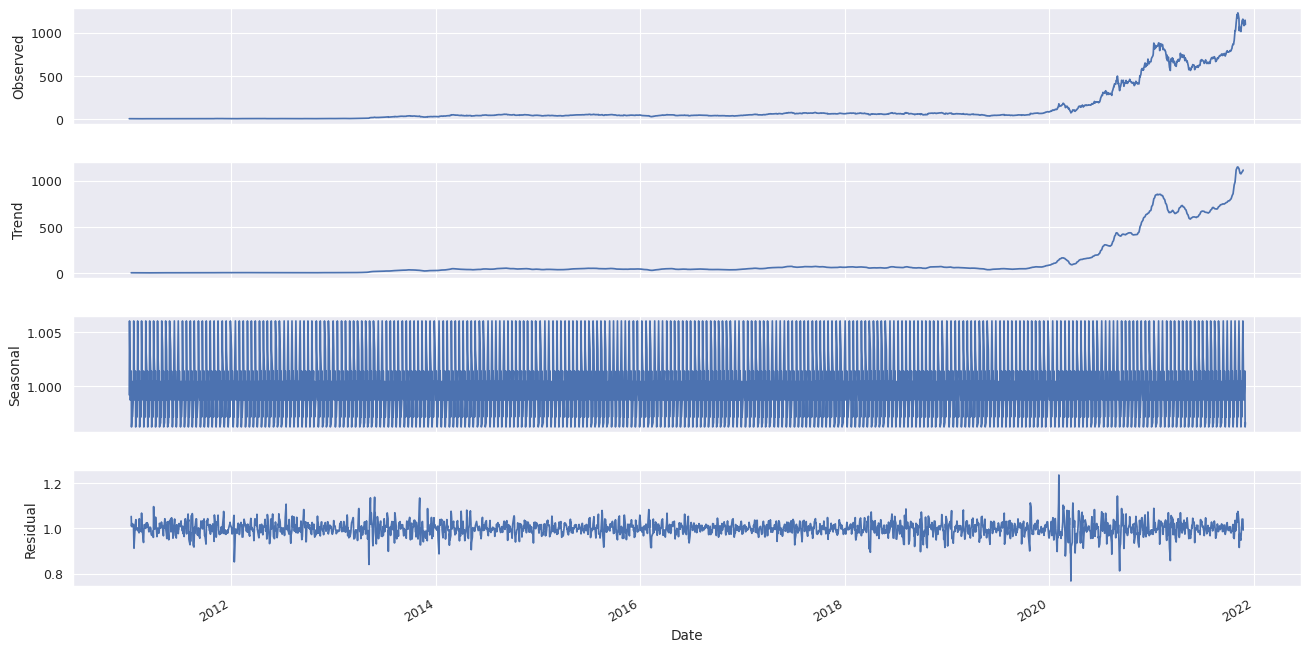

In [ ]:
result = seasonal_decompose(df['Close'], model='multiplicative',freq=10)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

<Figure size 1476x410 with 0 Axes>

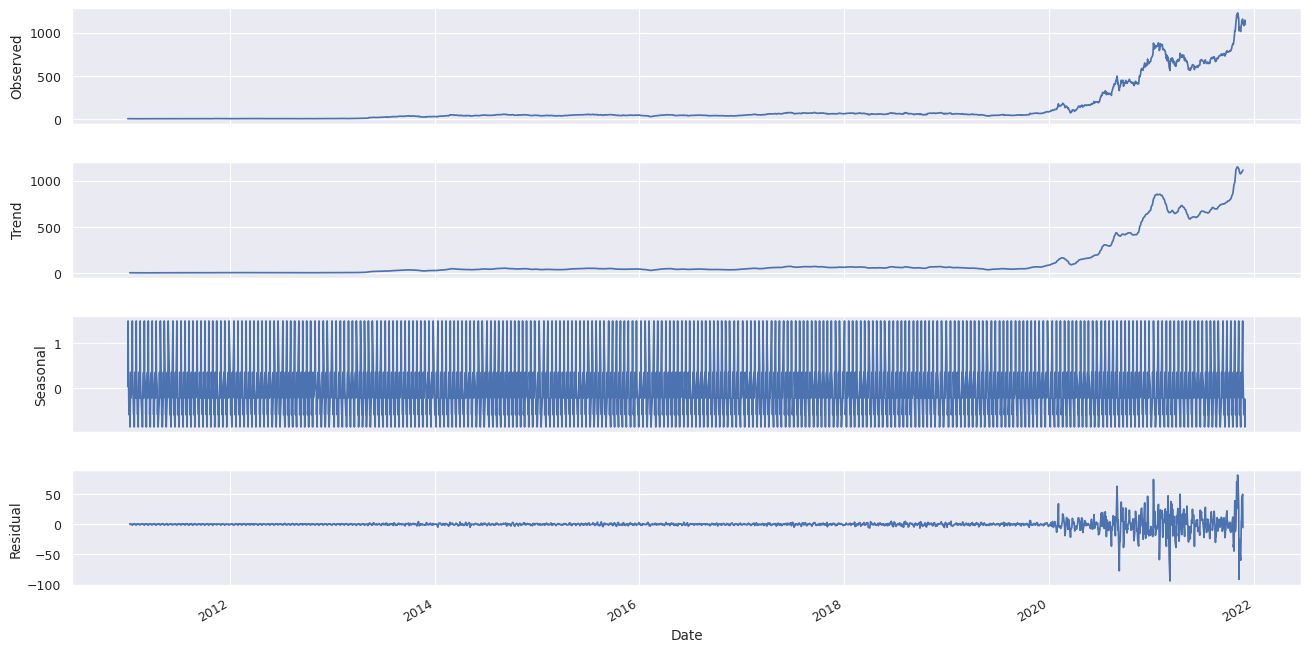

In [ ]:
result = seasonal_decompose(df['Close'], model='additive',freq =10 )
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16,9)

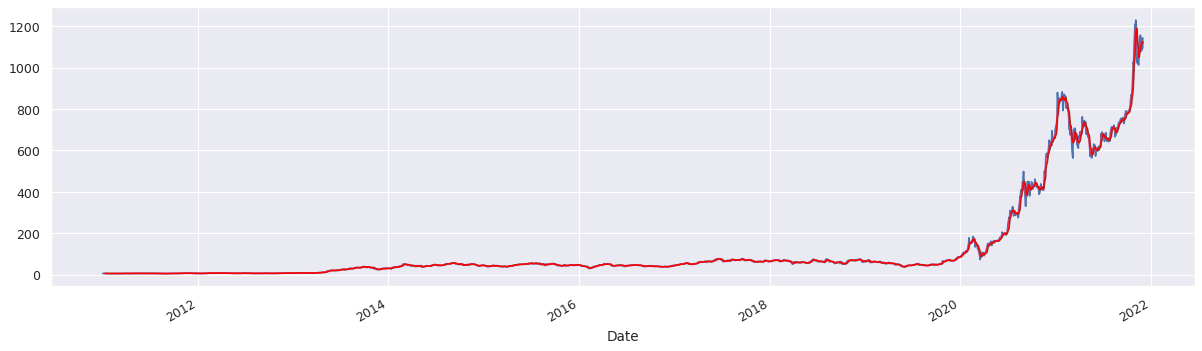

In [ ]:
df["Close"].plot()
rollmean=df["Close"].rolling(window=7).mean()
plt.plot(rollmean,color="red",label="rollin mean=12")

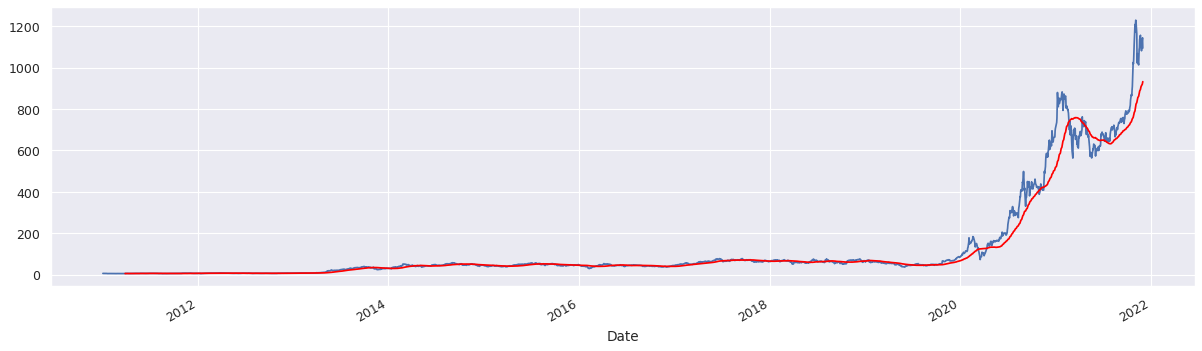

In [ ]:
df["Close"].plot()
rollmean=df["Close"].rolling(window=60).mean()
plt.plot(rollmean,color="red",label="rollin mean=12")

#Exponential smoothing Models


##Simple Exponential Smoothing

In [ ]:
#Simple exponential smoothing
#from statsmodels.tsa.api import SimpleExpSmoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing

In [ ]:
# SES with Alpha = 0.20
df['HWES1']=SimpleExpSmoothing(df.Close).fit(smoothing_level=0.2,optimized=False).fittedvalues

In [ ]:
df['HWES1']

Date
2011-01-03       5.324000
2011-01-04       5.324000
2011-01-05       5.326000
2011-01-06       5.334000
2011-01-07       5.382400
                 ...     
2021-11-24    1104.359861
2021-11-26    1106.687889
2021-11-29    1101.734320
2021-11-30    1108.785454
2021-12-01    1115.980365
Name: HWES1, Length: 2748, dtype: float64

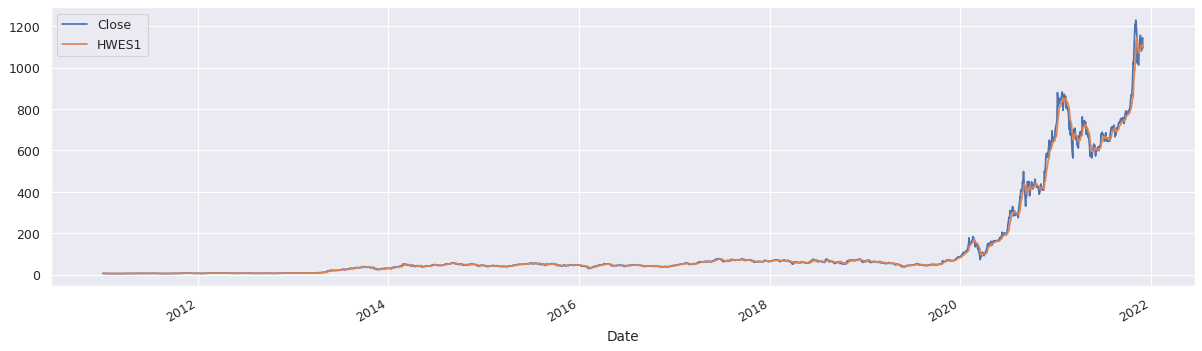

In [ ]:
df[["Close","HWES1"]].plot()

In [ ]:
# SES with Alpha = 0.20
model_1 = SimpleExpSmoothing(df.Close).fit(smoothing_level=0.2,optimized=False)

In [ ]:
# Model Parameters 
model_1.params

{'damping_slope': nan,
 'initial_level': 5.324,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.2,
 'smoothing_seasonal': None,
 'smoothing_slope': None,
 'use_boxcox': False}

In [ ]:
# Predction for next 60 days
fcast1 = model_1.forecast(60)
fcast1.head(10)

2748    1111.784292
2749    1111.784292
2750    1111.784292
2751    1111.784292
2752    1111.784292
2753    1111.784292
2754    1111.784292
2755    1111.784292
2756    1111.784292
2757    1111.784292
dtype: float64

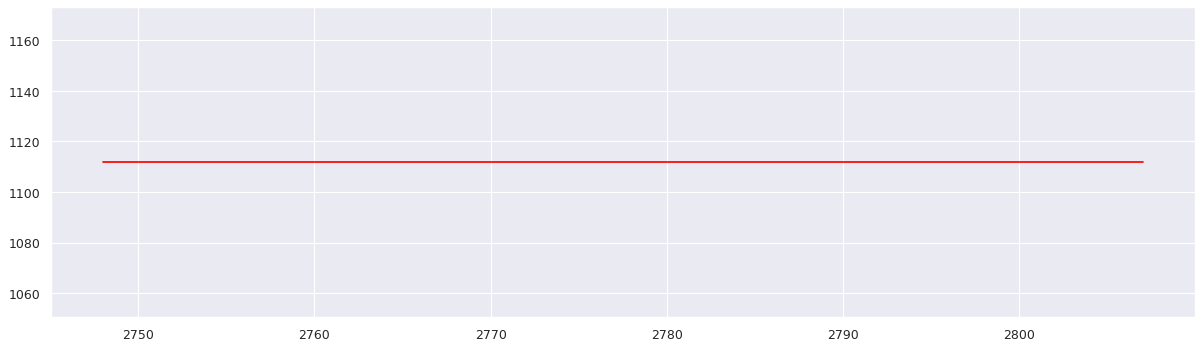

In [ ]:
index= pd.date_range(start='2021-12-01', end='2022-01-29', freq='D')
fcast1.plot(color="red")

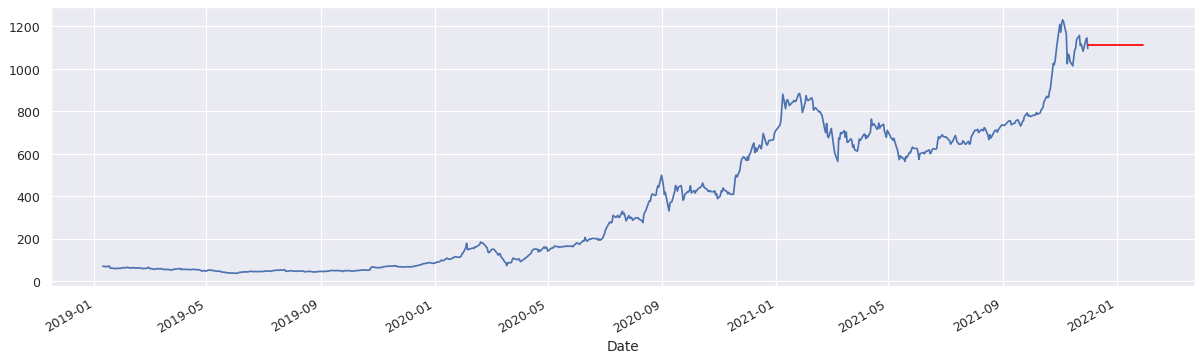

In [ ]:

df.Close[2018:].plot()
plt.plot(index,fcast1,color="red")


#automatic SES alpha predicted model

In [ ]:
# SES --- with optimized Alpha value automatically computed by the Statsmodels library 
df['HWES2']=SimpleExpSmoothing(df.Close).fit().fittedvalues

In [ ]:
df['HWES2']

Date
2011-01-03       5.324000
2011-01-04       5.324000
2011-01-05       5.333742
2011-01-06       5.365168
2011-01-07       5.570560
                 ...     
2021-11-24    1110.250543
2021-11-26    1115.851648
2021-11-29    1082.795575
2021-11-30    1135.591622
2021-12-01    1144.523440
Name: HWES2, Length: 2748, dtype: float64

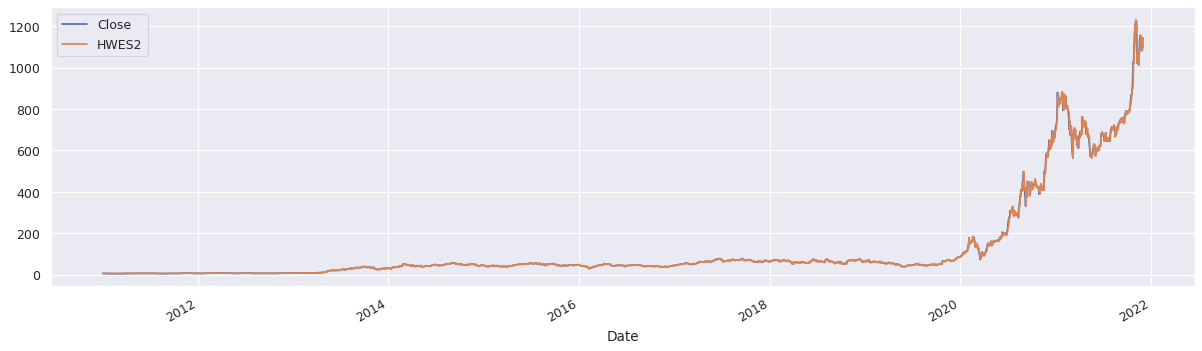

In [ ]:
df[["Close","HWES2"]].plot()

In [ ]:
# SES --- with optimized Alpha value automatically computed by the Statsmodels library 
model_2 = SimpleExpSmoothing(df.Close).fit()

In [ ]:
# Model Parameters
model_2.params

{'damping_slope': nan,
 'initial_level': 5.324,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.9741971851930077,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [ ]:
model_2.params['smoothing_level']

0.9741971851930077

In [ ]:
# Predction for next 60 days
fcast2 = model_2.forecast(60)
fcast2.head(10)

2748    1096.277844
2749    1096.277844
2750    1096.277844
2751    1096.277844
2752    1096.277844
2753    1096.277844
2754    1096.277844
2755    1096.277844
2756    1096.277844
2757    1096.277844
dtype: float64

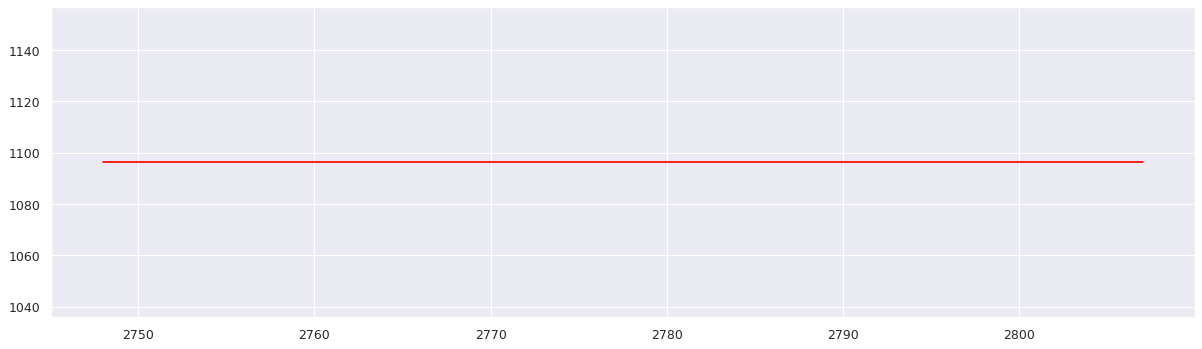

In [ ]:
fcast2.plot(color="red")

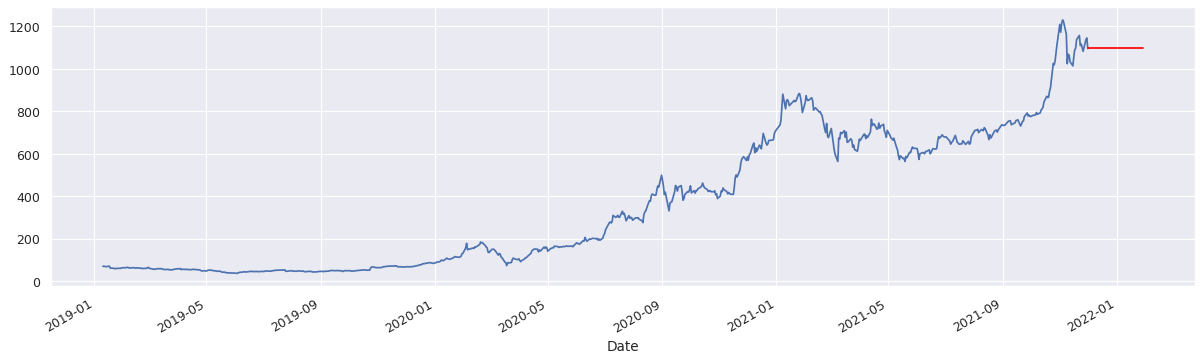

In [ ]:
df.Close[2018:].plot()
plt.plot(index,fcast2,color="red")


#Double Exponential Smoothing

In [ ]:
#Double Exponential Smoothing will automatically find the optimized alpha & beta values.
df["HWDS1"]=ExponentialSmoothing(df["Close"],trend="add").fit().fittedvalues

In [ ]:
df["HWDS1"]

Date
2011-01-03       5.339681
2011-01-04       5.340145
2011-01-05       5.349799
2011-01-06       5.381093
2011-01-07       5.585669
                 ...     
2021-11-24    1112.814635
2021-11-26    1118.000689
2021-11-29    1085.135640
2021-11-30    1137.385577
2021-12-01    1146.697266
Name: HWDS1, Length: 2748, dtype: float64

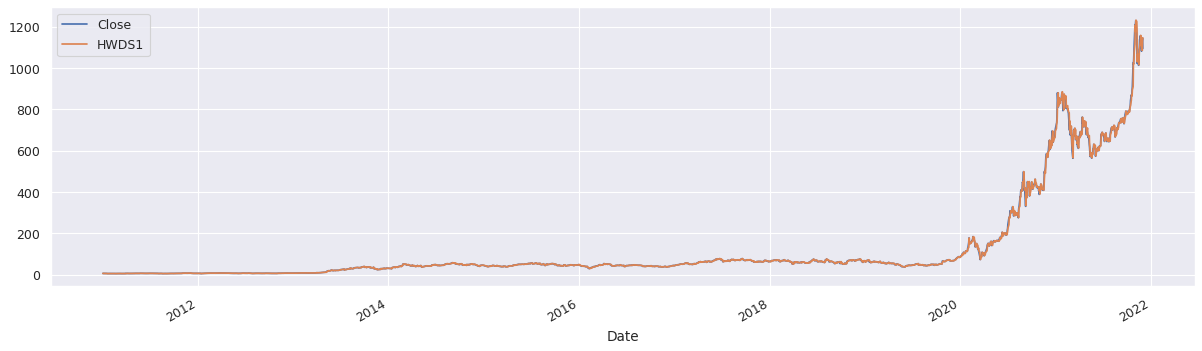

In [ ]:
df[["Close","HWDS1"]].plot()

In [ ]:
model_double1= ExponentialSmoothing(df["Close"],trend="add").fit()

In [ ]:
model_double1.params

{'damping_slope': nan,
 'initial_level': 5.324016693841693,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 0.015664584080690293,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.9659086371742053,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.0035501565473945113,
 'use_boxcox': False}

In [ ]:
#forecasting for 60 days
fcast_double1=model_double1.forecast(60)
fcast_double1.head(10)

2748    1098.773814
2749    1100.785198
2750    1102.796581
2751    1104.807965
2752    1106.819349
2753    1108.830732
2754    1110.842116
2755    1112.853500
2756    1114.864884
2757    1116.876267
dtype: float64

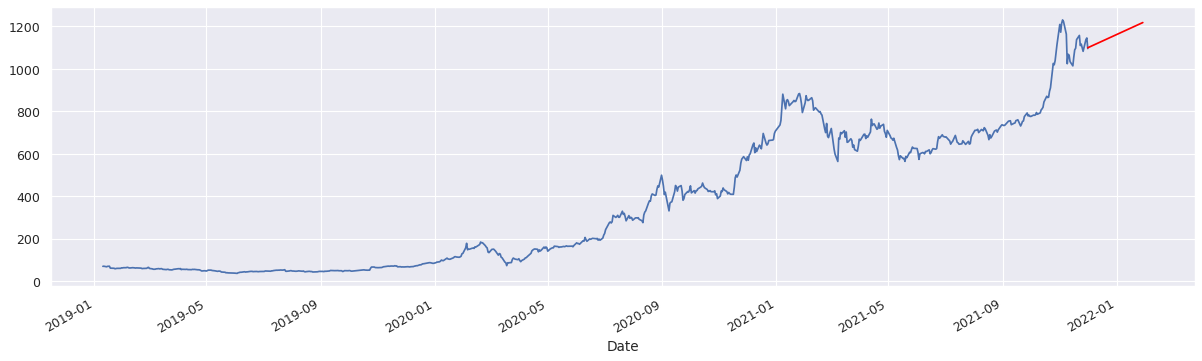

In [ ]:
df.Close[2018:].plot()
plt.plot(index,fcast_double1,color="red")

#Triple Exponential Smoothing

In [ ]:
#df = df.asfreq("MS")

In [ ]:
Train=df.iloc[:2920]
Test=df.iloc[2921:]
Train

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1988-12-26,9.5
1988-12-27,12.9
1988-12-28,12.9


In [ ]:
test_predictions01 = ExponentialSmoothing(df.Close,trend="add",seasonal="add",seasonal_periods=7).fit().forecast(60)

In [ ]:
#from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(df.Close,trend="add",seasonal="add", seasonal_periods=4)
fitted_model=model.fit()
#test_predictions = fitted_model.forecast(730)

In [ ]:
print(fitted_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 2748
Model:             ExponentialSmoothing   SSE                         238484.185
Optimized:                         True   AIC                          12281.505
Trend:                         Additive   BIC                          12328.854
Seasonal:                      Additive   AICC                         12281.585
Seasonal Periods:                     4   Date:                 Fri, 03 Dec 2021
Box-Cox:                          False   Time:                         09:15:40
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9668891                alpha                 True
smoothing_slope          

In [ ]:
sales_forecast = fitted_model.forecast(steps=60)
sales_forecast.head()

2748    1098.561784
2749    1101.170196
2750    1102.742716
2751    1104.755386
2752    1106.605547
dtype: float64

In [ ]:
#fitted_model.params

{'damping_slope': nan,
 'initial_level': 11.641724834440911,
 'initial_seasons': array([5.78478885, 5.60503849, 5.64629898, 5.79564326]),
 'initial_slope': 6.34545092286449e-17,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.4195113383161983,
 'smoothing_seasonal': 4.5052216087954644e-18,
 'smoothing_slope': 3.6113994293976013e-20,
 'use_boxcox': False}

In [ ]:
index= pd.date_range(start='2021-12-01', end='2022-01-29', freq='D')
index.shape

(60,)

In [ ]:
dfhw=pd.DataFrame(test_predictions01)
dfhw["Date"]=index
dfhw1=dfhw.set_index("Date")
dfhw1.rename(columns={0:"predicted"},inplace=True)
dfhw1

,predicted
Date,
1989-01-02,13.968485
1989-01-03,13.947444
1989-01-04,14.122914
1989-01-05,14.400982
1989-01-06,14.281947
...,...
1990-12-27,14.400982
1990-12-28,14.281947
1990-12-29,13.926878


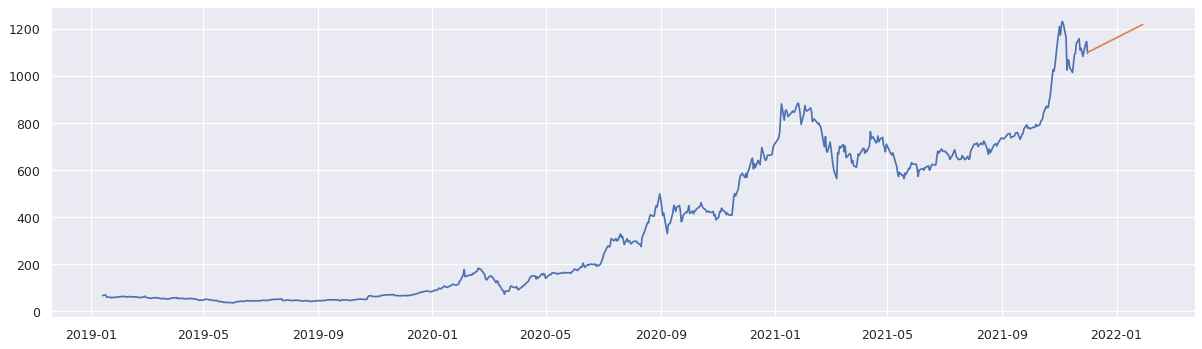

In [ ]:
#plt.plot(Train.index, Train, label='Sales History')
plt.plot(df.Close[2020:],label='Actual Sales')
plt.plot(index, sales_forecast,label='Sales Forecast')
plt.show()

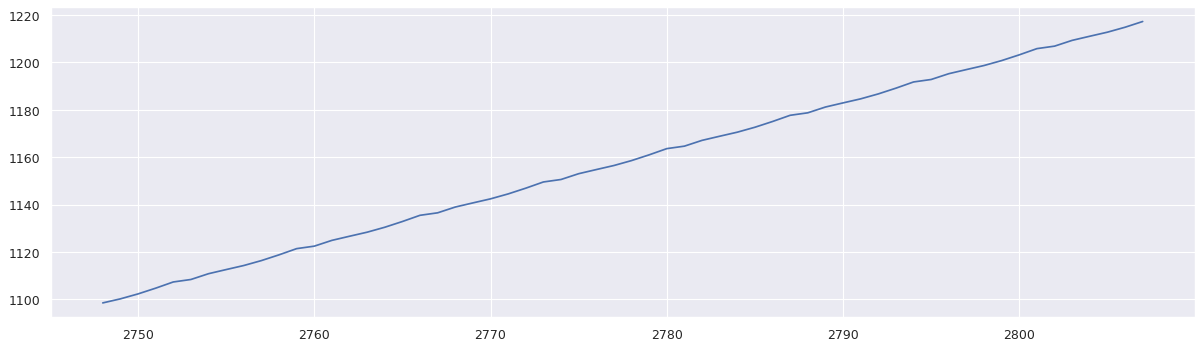

In [ ]:
test_predictions01.plot()